<a href="https://colab.research.google.com/github/TaskinF/cv/blob/main/W2W_Ran_Forrest_Regression_Gold_Price_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Data Collection and Processing**


In [ ]:
gold_data = pd.read_csv('gld_price_data.csv')

In [ ]:
#print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
#print last 5 rows in the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
#number of rows and columns
gold_data.shape

(2290, 6)

In [ ]:
#getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
#correlation between the various features
correlation= gold_data.corr()

<AxesSubplot:>

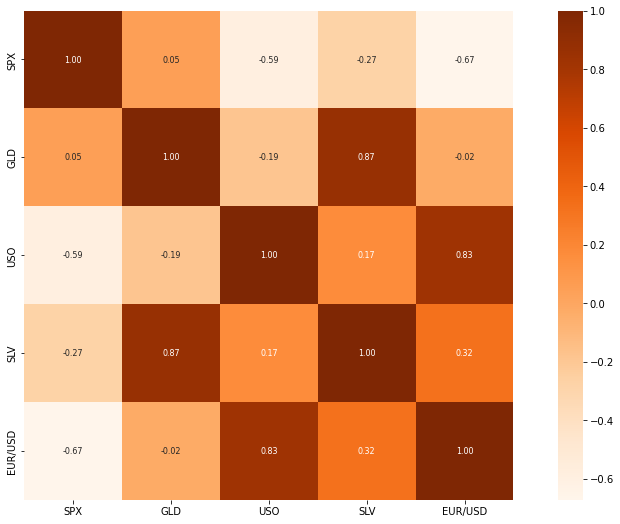

In [ ]:
#constructing a heatmap to understand the correlation
plt.figure(figsize = (16,9))
sns.heatmap(correlation, cbar=True, square=True,
           fmt='.2f',annot=True, annot_kws={'size':8},
            cmap='Oranges')

In [ ]:
#Correlation values of Gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [ ]:
#Distribution of the GLD Price
sns.distplot(gold_data['GLD'], color ='orange')

NameError: ignored

In [ ]:
#Splitting the Features and Dependent Variable
X=gold_data.drop(['Date','GLD'],axis=1)
y=gold_data['GLD']

In [ ]:
#Checking the features
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
#Checking the Dependent Variable
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


**Splitting the dataset into the Training set and Test set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size = 0.2, random_state = 0)

In [ ]:
print(X_test)

              SPX        USO        SLV   EUR/USD
1255  1692.770020  36.880001  20.980000  1.351698
2100  2425.530029   9.270000  14.990000  1.147394
711   1309.660034  42.049999  36.119999  1.410596
1328  1838.699951  33.689999  19.510000  1.361804
53    1298.420044  82.290001  18.250999  1.563893
...           ...        ...        ...       ...
2085  2429.389893   9.520000  16.040001  1.119620
1362  1877.170044  36.299999  20.010000  1.387867
828   1209.880005  33.310001  30.230000  1.376500
567   1089.469971  34.740002  17.530001  1.284406
1693  1952.290039  14.930000  13.990000  1.129089

[458 rows x 4 columns]


In [ ]:
print(X_train)

              SPX        USO        SLV   EUR/USD
486   1165.810059  39.560001  16.600000  1.356705
31    1349.989990  75.930000  16.952000  1.467610
1754  2041.890015  10.740000  13.080000  1.087453
1490  1862.760010  31.100000  16.670000  1.280442
1526  2026.140015  23.280001  16.370001  1.239495
...           ...        ...        ...       ...
1033  1461.050049  34.119999  33.570000  1.305824
1731  2023.040039  13.060000  13.590000  1.081502
763   1283.500000  36.009998  34.369999  1.427002
835   1218.280029  35.200001  32.330002  1.386001
1653  2077.419922  19.100000  14.900000  1.103363

[1832 rows x 4 columns]


**Training the Random Forest Regression model on the whole dataset**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

**Predicting the Test set results**

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
y_pred=np.array(y_pred)
y_test=np.array(y_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

**Evaluating The Model & R Squared**

In [ ]:
from sklearn.metrics import r2_score
r2_error = r2_score(y_test, y_pred)
print("R Squared error : ", r2_error)

R Squared error :  0.9899648553789232


**Applying k-Fold Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor , X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 98.74 %
Standard Deviation: 0.44 %


**Compare the Actual Values and Predicted Values in a Plot**

In [ ]:
#Converting the y_test to list
y_test=list(y_test)

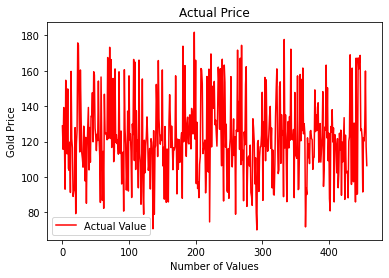

In [ ]:
#Actual Values in a Plot
plt.plot(y_test, color='red', label='Actual Value')
plt.title('Actual Price')
plt.xlabel('Number of Values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

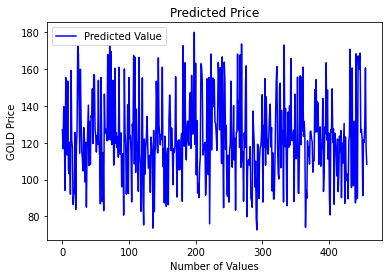

In [ ]:
#Predicted Values in a Plot
plt.plot(y_pred, color='blue' , label='Predicted Value')
plt.title('Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GOLD Price')
plt.legend()
plt.show()

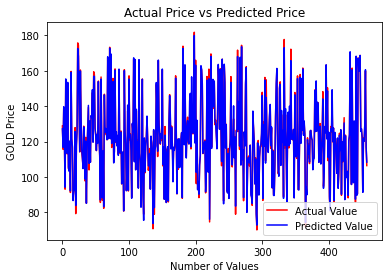

In [ ]:
#Actual Values vs Predicted Values in a Plot
plt.plot(y_test, color='red', label='Actual Value')
plt.plot(y_pred, color='blue' , label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GOLD Price')
plt.legend()
plt.show()